In [1]:
#|default_exp app

In [1]:
#|export
from fastai.vision.all import *
import gradio as gr
import os, random

def pizza_vs_ice(x): return "pizza" if x[:5]=='pizza' else 'ice cream'

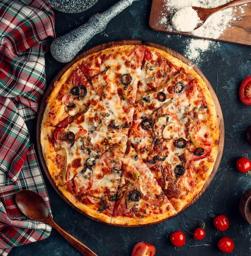

In [2]:
im = PILImage.create('pizza.jpg')
im.thumbnail((256,256))
im

In [3]:
#|export
learn = load_learner('model.pkl')

In [5]:
%time learn.predict('pizza.jpg')

CPU times: total: 531 ms
Wall time: 94.3 ms


('pizza', tensor(1), tensor([1.2096e-08, 1.0000e+00]))

In [6]:
#|export
categories = ('Ice Cream', 'Pizza')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [7]:
classify_image('pizza.jpg')

{'Ice Cream': 1.209623601283738e-08, 'Pizza': 1.0}

In [8]:
image = gr.inputs.Image(shape=(256,256))
label = gr.outputs.Label()
examples = ['pizza.jpg', 'ice cream.jpg', 'dunno.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

C:\Users\Ansh\PycharmProjects\Classifiers\venv\lib\site-packages\gradio\inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\Ansh\PycharmProjects\Classifiers\venv\lib\site-packages\gradio\inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
C:\Users\Ansh\PycharmProjects\Classifiers\venv\lib\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\Users\Ansh\PycharmProjects\Classifiers\venv\lib\site-packages\gradio\outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [9]:
m=learn.model